In [97]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv


In [98]:
data=pd.read_csv('/kaggle/input/nyc-east-river-bicycle-crossings/nyc-east-river-bicycle-counts.csv',
                low_memory=False)

In [99]:
data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [100]:
data.shape

(210, 11)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    object 
 6   Brooklyn Bridge      210 non-null    float64
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    float64
 9   Queensboro Bridge    210 non-null    float64
 10  Total                210 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 18.2+ KB


In [102]:
data.Day

0      2016-04-01 00:00:00
1      2016-04-02 00:00:00
2      2016-04-03 00:00:00
3      2016-04-04 00:00:00
4      2016-04-05 00:00:00
              ...         
205    2016-04-26 00:00:00
206    2016-04-27 00:00:00
207    2016-04-28 00:00:00
208    2016-04-29 00:00:00
209    2016-04-30 00:00:00
Name: Day, Length: 210, dtype: object

In [103]:
import datetime
data.Day = data.Day.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [104]:
data.Day

0     2016-04-01
1     2016-04-02
2     2016-04-03
3     2016-04-04
4     2016-04-05
         ...    
205   2016-04-26
206   2016-04-27
207   2016-04-28
208   2016-04-29
209   2016-04-30
Name: Day, Length: 210, dtype: datetime64[ns]

In [105]:
data['weekend'] = 0
data.loc[data.Day.dt.weekday>=5, 'weekend']=1

In [106]:
data.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend
Unnamed: 0,1.000000,0.070144,0.055420,0.100557,0.090508,0.096328,0.093006,0.095156,-0.006599
High Temp (°F),0.070144,1.000000,0.823853,0.739377,0.720175,0.764336,0.727825,0.743344,-0.107708
Low Temp (°F),0.055420,0.823853,1.000000,0.464550,0.465097,0.534212,0.475725,0.492124,-0.137974
Brooklyn Bridge,0.100557,0.739377,0.464550,1.000000,0.983148,0.980463,0.976991,0.989339,-0.263025
Manhattan Bridge,0.090508,0.720175,0.465097,0.983148,1.000000,0.989805,0.985867,0.996323,-0.343058
Williamsburg Bridge,0.096328,0.764336,0.534212,0.980463,0.989805,1.000000,0.988852,0.996639,-0.301703
Queensboro Bridge,0.093006,0.727825,0.475725,0.976991,0.985867,0.988852,1.000000,0.993391,-0.283479
Total,0.095156,0.743344,0.492124,0.989339,0.996323,0.996639,0.993391,1.000000,-0.305580
weekend,-0.006599,-0.107708,-0.137974,-0.263025,-0.343058,-0.301703,-0.283479,-0.305580,1.000000


In [107]:
data = data[~(data.Precipitation =='T')]
data.loc[data.Precipitation =='0.47 (S)', 'Precipitation'] = 0.47
data.Precipitation = data.Precipitation.astype(float)

In [108]:
data.Precipitation.value_counts()

0.00    119
0.01     21
0.09     21
0.15      7
0.47      7
0.20      7
0.16      7
0.24      7
0.05      7
Name: Precipitation, dtype: int64

In [109]:
data.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend
Unnamed: 0,1.000000,0.068401,0.052638,-0.033753,0.100455,0.090544,0.096174,0.093183,0.095115,-0.004282
High Temp (°F),0.068401,1.000000,0.805983,-0.334064,0.738824,0.727551,0.766709,0.737359,0.748040,-0.076106
Low Temp (°F),0.052638,0.805983,1.000000,-0.142855,0.449257,0.461594,0.525649,0.475111,0.485360,-0.104966
Precipitation,-0.033753,-0.334064,-0.142855,1.000000,-0.594789,-0.584712,-0.571189,-0.592933,-0.586797,0.001993
Brooklyn Bridge,0.100455,0.738824,0.449257,-0.594789,1.000000,0.983749,0.980156,0.977857,0.989459,-0.250859
Manhattan Bridge,0.090544,0.727551,0.461594,-0.584712,0.983749,1.000000,0.990223,0.985779,0.996428,-0.335629
Williamsburg Bridge,0.096174,0.766709,0.525649,-0.571189,0.980156,0.990223,1.000000,0.989541,0.996721,-0.290820
Queensboro Bridge,0.093183,0.737359,0.475111,-0.592933,0.977857,0.985779,0.989541,1.000000,0.993624,-0.276067
Total,0.095115,0.748040,0.485360,-0.586797,0.989459,0.996428,0.996721,0.993624,1.000000,-0.296154
weekend,-0.004282,-0.076106,-0.104966,0.001993,-0.250859,-0.335629,-0.290820,-0.276067,-0.296154,1.000000


In [110]:
X=data[['High Temp (°F)','Precipitation', 'weekend']]
y=data[['Total']]

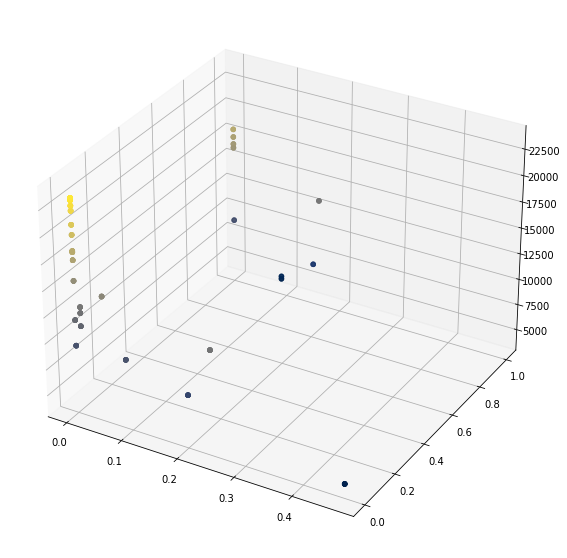

In [111]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection="3d")

ax.scatter3D(X.iloc[:,1], X.iloc[:,2], y, c=y, cmap='cividis');

plt.show()


In [112]:
data['average_temp']=data[['High Temp (°F)','Low Temp (°F)']].mean(axis=1)
data['diff_temp']=data['High Temp (°F)']- data['Low Temp (°F)']
data['weekend_temp']=data['High Temp (°F)']* data['weekend']


In [113]:
data.columns

Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total', 'weekend',
       'average_temp', 'diff_temp', 'weekend_temp'],
      dtype='object')

In [114]:
data.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend,average_temp,diff_temp,weekend_temp
Unnamed: 0,1.000000,0.068401,0.052638,-0.033753,0.100455,0.090544,0.096174,0.093183,0.095115,-0.004282,0.064373,0.040593,0.010248
High Temp (°F),0.068401,1.000000,0.805983,-0.334064,0.738824,0.727551,0.766709,0.737359,0.748040,-0.076106,0.958629,0.541711,0.066515
Low Temp (°F),0.052638,0.805983,1.000000,-0.142855,0.449257,0.461594,0.525649,0.475111,0.485360,-0.104966,0.941139,-0.060952,-0.010005
Precipitation,-0.033753,-0.334064,-0.142855,1.000000,-0.594789,-0.584712,-0.571189,-0.592933,-0.586797,0.001993,-0.259462,-0.360450,-0.020468
Brooklyn Bridge,0.100455,0.738824,0.449257,-0.594789,1.000000,0.983749,0.980156,0.977857,0.989459,-0.250859,0.637941,0.607868,-0.124331
Manhattan Bridge,0.090544,0.727551,0.461594,-0.584712,0.983749,1.000000,0.990223,0.985779,0.996428,-0.335629,0.637437,0.571341,-0.223196
Williamsburg Bridge,0.096174,0.766709,0.525649,-0.571189,0.980156,0.990223,1.000000,0.989541,0.996721,-0.290820,0.690601,0.546412,-0.169616
Queensboro Bridge,0.093183,0.737359,0.475111,-0.592933,0.977857,0.985779,0.989541,1.000000,0.993624,-0.276067,0.649537,0.568685,-0.148020
Total,0.095115,0.748040,0.485360,-0.586797,0.989459,0.996428,0.996721,0.993624,1.000000,-0.296154,0.660566,0.572141,-0.174711
weekend,-0.004282,-0.076106,-0.104966,0.001993,-0.250859,-0.335629,-0.290820,-0.276067,-0.296154,1.000000,-0.093937,0.020723,0.972334


## Combination of features for the model

In [115]:
features_1=['Precipitation','High Temp (°F)','weekend']
features_2=['Precipitation','High Temp (°F)','weekend', 'Low Temp (°F)']
features_3=['Precipitation','High Temp (°F)','weekend', 'diff_temp']
features_4=['Precipitation','High Temp (°F)','weekend', 'diff_temp', 'weekend_temp']

## Training and Fitting the Linear Model

In [116]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [117]:
r2=[]
MaE=[]
MSE=[]
RMSE=[]
MAPE=[]

features=[]
model_name=[]

In [118]:
for f in [features_1,features_2,features_3,features_4]:
    X=data[f]
    y=data[['Total']]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=50)
    model=LinearRegression()
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
    r2.append(r2_score(y_test,y_pred))
    MaE.append(mean_absolute_error(y_test,y_pred))
    MSE.append(mean_squared_error(y_test,y_pred))
    RMSE.append(mean_squared_error(y_test,y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test,y_pred))
    
    features.append(f)
    model_name.append('linear')
    
    

##  Polynomial regression model

In [137]:
for f in [features_1, features_2, features_3, features_4]:
  X = data[f]
  y = data[['Total']]
  square_f = PolynomialFeatures(2)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

  X_train_sq = square_f.fit_transform(X_train)
  X_test_sq = square_f.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_sq, y_train)
  y_pred = model.predict(X_test_sq)
  
  r2.append(r2_score(y_test, y_pred))
  
  MaE.append(mean_absolute_error(y_test, y_pred))
  
  MSE.append(mean_squared_error(y_test, y_pred))
  RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
  MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  features.append(f)
  model_name.append('linear')

In [138]:
results = pd.DataFrame(r2).rename(columns={0:'R2_score'})
results['mae_KFold'] = MaE
results['MSE'] = MSE
results['RMSE'] = RMSE
results['MAPE'] = MAPE
results['features'] = features
results['Model'] = model_name

ValueError: Length of values (16) does not match length of index (45)

## Using KFold

In [121]:
r_score_KFold = []
mae_KFold =[]
mse_KFold = []
rmse_KFold = []
mape_KFold = []

features = []
model_name = []

## Linear Regression

In [122]:
for f in [features_1, features_2, features_3, features_4]:
    X = data[f]
    y = data[['Total']]
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = []
    MaE = []
    MSE = []
    MAPE = []
    RMSE = []

    for tr, ts in cv.split(X,y):
        X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

    r_score_KFold.append(np.array(r2).mean())
    mae_KFold.append(np.array(MaE).mean())
    mse_KFold.append(np.array(MSE).mean())
    rmse_KFold.append(np.array(RMSE).mean())
    mape_KFold.append(np.array(MAPE).mean())
    features.append(f)
    model_name.append('linear')

## Polynomial second degree

In [123]:
for f in [features_1, features_2, features_3, features_4]:
  X = data[f]
  y = data[['Total']]
  square_f = PolynomialFeatures(2)
  
  

  for tr, ts in cv.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
    model = LinearRegression()
    X_train_sq = square_f.fit_transform(X_train)
    X_test_sq = square_f.transform(X_test)
    model.fit(X_train_sq, y_train)
    y_pred = model.predict(X_test_sq)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  r_score_KFold.append(np.array(r2).mean())
  mae_KFold.append(np.array(MaE).mean())
  mse_KFold.append(np.array(MSE).mean())
  rmse_KFold.append(np.array(RMSE).mean())
  mape_KFold.append(np.array(MAPE).mean())
  features.append(f)
  model_name.append('Polynomial')

## Polynomial third degree

In [125]:
for f in [features_1, features_2, features_3, features_4]:
  X = data[f]
  y = data[['Total']]
  #define polynomial transformer
  square_f = PolynomialFeatures(3)
  #split the data into train and test sets
  

  for tr, ts in cv.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
    model = LinearRegression()
    X_train_sq = square_f.fit_transform(X_train)
    X_test_sq = square_f.transform(X_test)
    model.fit(X_train_sq, y_train)
    y_pred = model.predict(X_test_sq)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  r_score_KFold.append(np.array(r2).mean())
  mae_KFold.append(np.array(MaE).mean())
  mse_KFold.append(np.array(MSE).mean())
  rmse_KFold.append(np.array(RMSE).mean())
  mape_KFold.append(np.array(MAPE).mean())
  features.append(f)
  model_name.append('Polynomial_3')

In [126]:
results_KFold = pd.DataFrame(r_score_KFold).rename(columns={0:'R2_score'})
results_KFold['mae_KFold'] = mae_KFold
results_KFold['MSE'] = mse_KFold
results_KFold['RMSE'] = rmse_KFold
results_KFold['MAPE'] = mape_KFold
results_KFold['features'] = features
results_KFold['Model'] = model_name

In [127]:
results_KFold

,R2_score,mae_KFold,MSE,RMSE,MAPE,features,Model
0,0.466726,2193.807083,1.207110e+07,3474.348777,0.164860,"[Precipitation, High Temp (°F), weekend]",linear
1,0.536534,2146.846605,1.049092e+07,3238.969730,0.155093,"[Precipitation, High Temp (°F), weekend, Low T...",linear
2,0.536534,2146.846605,1.049092e+07,3238.969730,0.155093,"[Precipitation, High Temp (°F), weekend, diff_...",linear
3,0.556694,2113.291964,1.003460e+07,3167.743177,0.150315,"[Precipitation, High Temp (°F), weekend, diff_...",linear
4,0.750067,1839.134775,6.805987e+06,2586.948626,0.146848,"[Precipitation, High Temp (°F), weekend]",Polynomial
5,0.796095,1727.843885,5.735091e+06,2367.979920,0.140190,"[Precipitation, High Temp (°F), weekend, Low T...",Polynomial
6,0.813355,1686.109801,5.333505e+06,2285.866655,0.137693,"[Precipitation, High Temp (°F), weekend, diff_...",Polynomial
7,0.829570,1593.427611,4.908765e+06,2188.240232,0.125486,"[Precipitation, High Temp (°F), weekend, diff_...",Polynomial
8,0.852524,1449.316045,4.257100e+06,2003.483488,0.112960,"[Precipitation, High Temp (°F), weekend]",Polynomial_3
9,0.876069,1230.791460,3.577504e+06,1713.581331,0.095528,"[Precipitation, High Temp (°F), weekend, Low T...",Polynomial_3


## Decision Tree GRid

In [128]:
our_param_grid = {'max_depth':[2], 'min_samples_split': [4,5,6,8,20, 50, 80]}
model_tree = DecisionTreeRegressor()

In [129]:
grid_model = GridSearchCV(model_tree, param_grid=our_param_grid)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
grid_model.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2],
                         'min_samples_split': [4, 5, 6, 8, 20, 50, 80]})

In [130]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=2, min_samples_split=4)

In [131]:
y_pred_tree = grid_model.predict(X_test)

In [132]:
r2_score(y_test, y_pred_tree)

0.8388256137058584

In [133]:
mean_absolute_error(y_test, y_pred_tree)

1833.1479466600044

In [134]:
mean_absolute_percentage_error(y_test, y_pred_tree)

0.14841021201038362

In [135]:
mean_squared_error(y_test, y_pred_tree)

5342601.39099404

In [136]:
mean_squared_error(y_test, y_pred_tree, squared=False)

2311.4067991147817